In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from acquire import get_titanic_data
from acquire import get_iris_data
from prepare import prep_titanic_data
from prepare import prep_iris


df = prep_titanic_data(get_titanic_data())

# Logistic Regression


In [2]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
df.dropna(inplace=True)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['sex'])
df['sex_encode'] = le.transform(df['sex'])
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3,1


In [5]:
train, test = train_test_split(df, random_state= 123)


In [6]:
scaler = MinMaxScaler()
scaler.fit(train[['age', 'fare']])

train[['age', 'fare']] = scaler.transform(train[['age', 'fare']])
test[['age', 'fare']] = scaler.transform(test[['age', 'fare']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [7]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode
86,86,0,3,male,0.195778,1,3,0.067096,S,Third,Southampton,0,3,1
184,184,1,3,female,0.044986,0,2,0.042990,S,Third,Southampton,0,3,0
406,406,0,3,male,0.635587,0,0,0.015127,S,Third,Southampton,1,3,1
285,285,0,3,male,0.409399,0,0,0.016908,C,Third,Cherbourg,1,0,1
591,591,1,1,female,0.648153,1,0,0.152766,C,First,Cherbourg,0,0,0


In [8]:
# Logistic Regression
 
# Fit the logistic regression classifier to your training sample and transform, 
# i.e. make predictions on the training sample

logit = LogisticRegression()

logit_fit = logit.fit(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
y_pred = logit.predict(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])

y_pred


array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [10]:
y_pred_proba = logit.predict_proba(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])

y_pred_proba


array([[0.82927821, 0.17072179],
       [0.27654945, 0.72345055],
       [0.90932007, 0.09067993],
       ...,
       [0.30450696, 0.69549304],
       [0.88193022, 0.11806978],
       [0.65268962, 0.34731038]])

In [11]:
train['prediction'] = logit.predict(train[['pclass','age','fare','sibsp','parch', 'sex_encode']])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,sex_encode,prediction
86,86,0,3,male,0.195778,1,3,0.067096,S,Third,Southampton,0,3,1,0
184,184,1,3,female,0.044986,0,2,0.042990,S,Third,Southampton,0,3,0,1
406,406,0,3,male,0.635587,0,0,0.015127,S,Third,Southampton,1,3,1,0
285,285,0,3,male,0.409399,0,0,0.016908,C,Third,Cherbourg,1,0,1,0
591,591,1,1,female,0.648153,1,0,0.152766,C,First,Cherbourg,0,0,0,1


In [12]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)))


Accuracy of Logistic Regression classifier on training set: 0.79


In [13]:
confusion_matrix(train.survived, train.prediction)


array([[269,  47],
       [ 64, 155]])

In [14]:
cm = pd.DataFrame(confusion_matrix(train.survived, train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,269,47
Actual +,64,155


In [15]:
print(classification_report(train.survived, train.prediction))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       316
           1       0.77      0.71      0.74       219

   micro avg       0.79      0.79      0.79       535
   macro avg       0.79      0.78      0.78       535
weighted avg       0.79      0.79      0.79       535



In [16]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(train[['pclass','age','fare','sibsp','parch', 'sex_encode']], train.survived)))


Accuracy of Logistic Regression classifier on test set: 0.79


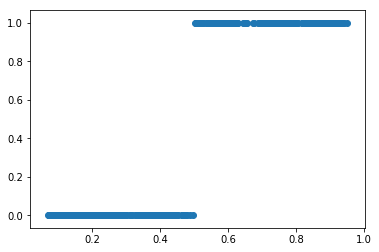

In [17]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)


Which performs better on your in-sample data?

- all came back as 0.79

# Decision Tree


### Iris Data

In [18]:
iris_df = prep_iris(get_iris_data())

In [19]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [20]:
X = iris_df.drop(['species', 'species_encoded'],axis=1)
y = iris_df[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [21]:
clf = DecisionTreeClassifier(criterion='entropy')
tree_fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

y_pred[:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [22]:
y_pred_proba = clf.predict_proba(X_train)

y_pred_proba[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [23]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 1.00


In [24]:
confusion_matrix(y_train, y_pred)


array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 33]])

In [25]:
sorted(y_train.species.unique())


['setosa', 'versicolor', 'virginica']

In [26]:
y_train.species.value_counts()


versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [27]:
labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,0,33


In [28]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [29]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on test set: 0.96


In [30]:
from sklearn.datasets import load_iris

# iris = load_iris()
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)

# import graphviz

# from graphviz import Graph

# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree2', view=True)


## Titanic Data

In [39]:
train_X_Titanic = train[['pclass','age','fare','sibsp','parch', 'sex_encode']]
train_y_Titanic = train[['survived']]

test_X_Titanic = test[['pclass','age','fare','sibsp','parch', 'sex_encode']]
test_y_Titanic = test[['survived']]

In [119]:
clf_Titanic = DecisionTreeClassifier(max_depth=4)
tree_fit_Titanic = clf_Titanic.fit(train_X_Titanic, train_y_Titanic)
y_pred_Titanic = clf_Titanic.predict(train_X_Titanic)


In [120]:
y_pred_proba_Titanic = clf_Titanic.predict_proba(train_X_Titanic)

y_pred_proba_Titanic[:5]

array([[1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.89150943, 0.10849057],
       [0.89150943, 0.10849057],
       [0.01449275, 0.98550725]])

In [121]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_Titanic.score(train_X_Titanic, train_y_Titanic)))

Accuracy of Decision Tree classifier on training set: 0.84


In [127]:
cm = pd.DataFrame(confusion_matrix(train_y_Titanic, y_pred_Titanic),
             columns=['Pred Death', 'Pred Life'], index=['Died', 'Lived'])

cm

,Pred Death,Pred Life
Died,286,30
Lived,54,165


In [123]:
print(classification_report(train_y_Titanic, y_pred_Titanic))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       316
           1       0.85      0.75      0.80       219

   micro avg       0.84      0.84      0.84       535
   macro avg       0.84      0.83      0.83       535
weighted avg       0.84      0.84      0.84       535



In [124]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_Titanic.score(test_X_Titanic, test_y_Titanic)))

Accuracy of Decision Tree classifier on test set: 0.83
